In [2]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDLaCcZsQc3jmm10WXUsnM-IV6u8MROUraydumwfFRkuOJmyTE0FJz0OaLehz96bju4Cs&usqp=CAU  -O image.jpg

/bin/bash: -O: command not found
--2022-06-14 17:42:32--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDLaCcZsQc3jmm10WXUsnM-IV6u8MROUraydumwfFRkuOJmyTE0FJz0OaLehz96bju4Cs
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.141.102, 74.125.141.101, 74.125.141.139, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.141.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19236 (19K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcTDLaCcZsQc3jmm10WXUsnM-IV6u8MROUraydumwfFRkuOJmyTE0FJz0OaLehz96bju4Cs’

images?q=tbn:ANd9Gc 100%[===================>]  18.79K  --.-KB/s    in 0s      

2022-06-14 17:42:32 (116 MB/s) - ‘images?q=tbn:ANd9GcTDLaCcZsQc3jmm10WXUsnM-IV6u8MROUraydumwfFRkuOJmyTE0FJz0OaLehz96bju4Cs’ saved [19236/19236]



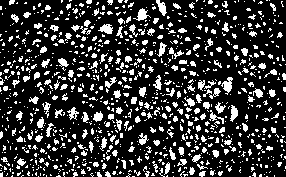

Quantidade de Bolhas: 1039
Tamanho da menor:  1
Tamanho da maior:  40
Media de tamanho:  12.890279114533206


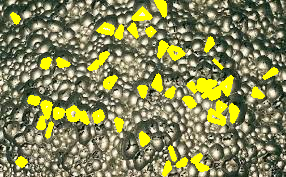

In [18]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


img = cv2.imread('image.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binaria = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

cv2_imshow(binaria)

contours, hierarchy = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

quantidade_de_bolhas = len(contours)

historico_area = []

print("Quantidade de Bolhas: {}".format(quantidade_de_bolhas))

for contorno in contours:
  contours_poly = cv2.approxPolyDP(contorno, 3, True)

  x,y,w,h = cv2.boundingRect(contours_poly)
  area = len(contorno)
  historico_area.append(area)


media = np.array(historico_area).mean()

menor = np.array(historico_area).min()
maior = np.array(historico_area).max()
print("Tamanho da menor: ", menor)
print("Tamanho da maior: ", maior)
print("Media de tamanho: ", media_de_areas)

for contorno in contours:
  contours_poly = cv2.approxPolyDP(contorno, 3, True)
  x,y,w,h = cv2.boundingRect(contours_poly)
  area = w * h
  if area > media*10:
    hull = cv2.convexHull(contours_poly)

    # Plota linhas externas do contorno da máscara em amarelo
    cv2.drawContours(img, [hull], 0, (0, 255, 255), 3)
cv2_imshow(img)